# Média Móvel

Utilizaremos dados sobre desvio da temperatura média global da terra-oceano (com referência média de 1951-1980), medidos em graus Celsius, para os anos de 1880-2015.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

In [29]:
dados = pd.read_csv('temp_global.csv')
dados

,x
1,-0.20
2,-0.11
3,-0.10
4,-0.20
5,-0.28
...,...
132,0.60
133,0.63
134,0.66
135,0.75


In [30]:
indice = pd.date_range('1880 Jan 1', periods = len(dados), freq = 'Y')
indice

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', length=136, freq='A-DEC')

In [31]:
serie = pd.Series(dados['x'].values, index = indice)
serie

1880-12-31   -0.20
1881-12-31   -0.11
1882-12-31   -0.10
1883-12-31   -0.20
1884-12-31   -0.28
              ... 
2011-12-31    0.60
2012-12-31    0.63
2013-12-31    0.66
2014-12-31    0.75
2015-12-31    0.87
Freq: A-DEC, Length: 136, dtype: float64

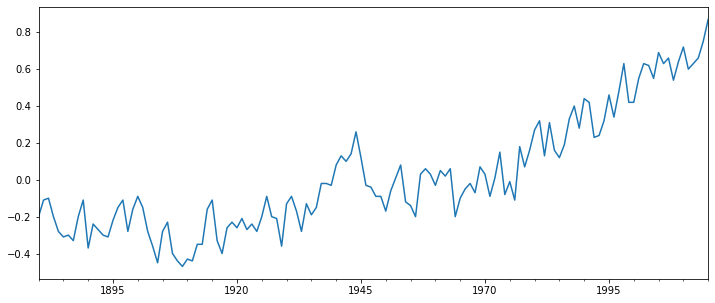

In [32]:
serie.plot();

In [33]:
media_movel1 = serie.rolling(window=3) # Window significa o período de referência
media_movel1 = media_movel1.mean()

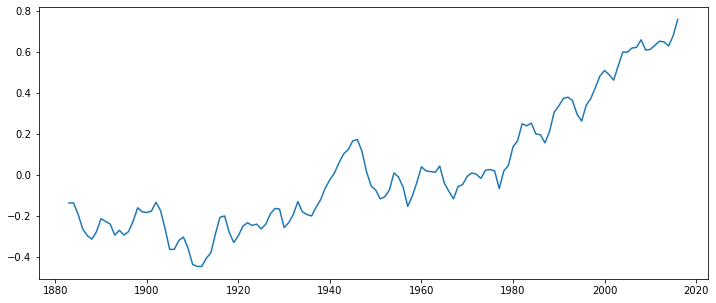

In [34]:
plt.plot(media_movel1);

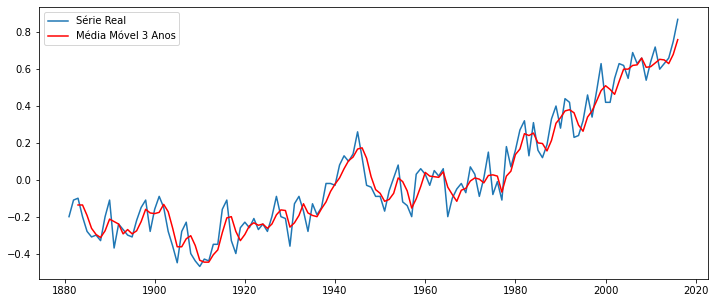

In [35]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel1, color='red', label='Média Móvel 3 Anos')
plt.legend(loc='best')
plt.show()

In [36]:
# Vamos fazer uma média móvel com um período maior, com 10 anos.

media_movel2 = serie.rolling(window=10)
media_movel2 = media_movel2.mean()

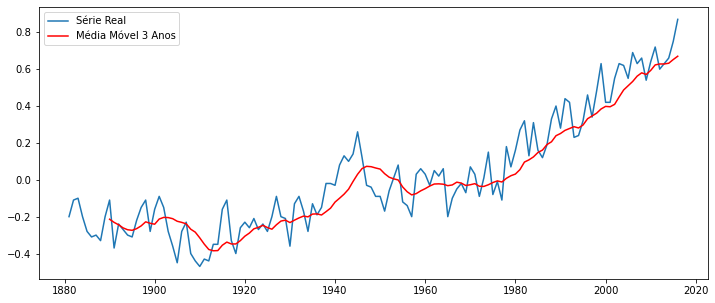

In [50]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel2, color='red', label='Média Móvel 3 Anos')
plt.legend(loc='best')
plt.show()

É possível perceber que a média móvel é suavizada conforme o tempo é aumentado.

In [48]:
media_movel3 = serie.rolling(window=20)
media_movel3 = media_movel3.mean()

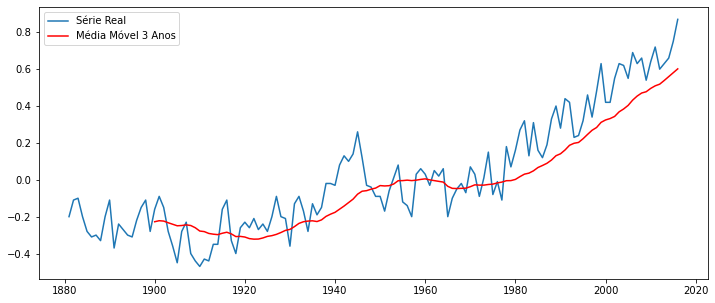

In [51]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel3, color='red', label='Média Móvel 3 Anos')
plt.legend(loc='best')
plt.show()

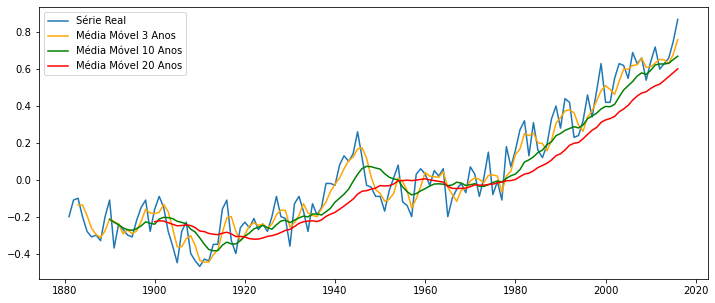

In [52]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel1, color='orange', label='Média Móvel 3 Anos')
plt.plot(media_movel2, color='green', label='Média Móvel 10 Anos')
plt.plot(media_movel3, color='red', label='Média Móvel 20 Anos')
plt.legend(loc='best')
plt.show()

Existe a média móvel centralizada, ou seja, se tivermos uma media móvel de 10 anos, perdemos 5 anos no início e 5 no final. Diferente da usada acima.

In [53]:
media_movel4 = serie.rolling(window=3, center=True) # Queremos ela centralizada.
media_movel4 = media_movel4.mean()

In [54]:
media_movel5 = serie.rolling(window=10, center=True)
media_movel5 = media_movel5.mean()

In [55]:
media_movel6 = serie.rolling(window=20, center=True)
media_movel6 = media_movel6.mean()

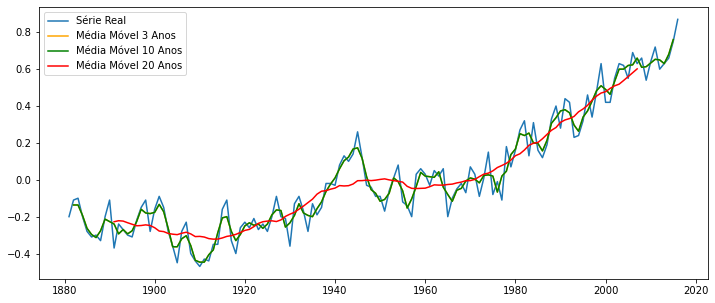

In [56]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel4, color='orange', label='Média Móvel 3 Anos')
plt.plot(media_movel5, color='green', label='Média Móvel 10 Anos')
plt.plot(media_movel6, color='red', label='Média Móvel 20 Anos')
plt.legend(loc='best')
plt.show()

A linha vermelha perdeu 10 anos no começo e 10 anos no final, mas é possível perceber que ela passa juntamente com a real, muito parecida com a verde. Visualmente, a média móvel centralizada, neste caso, aparenta ser melhor.